In [1]:
import quilt3
b = quilt3.Bucket("s3://spatial-ucr")

In [2]:
b.ls(".quilt/named_packages/nces/schools/")

([],
 [{'ETag': '"ec5de9f291f6b907d3f2a8ef6ba2a6c6"',
   'Size': 64,
   'StorageClass': 'STANDARD',
   'Key': '.quilt/named_packages/nces/schools/1616176289',
   'VersionId': '1KKzSIi59WhOyTiq6.UDTuy_kKpbcWkR',
   'IsLatest': True,
   'LastModified': datetime.datetime(2021, 3, 19, 17, 51, 32, tzinfo=tzlocal()),
   'Owner': {'DisplayName': 'aneesh+openucr',
    'ID': '8e3421f4b6da6d660b2795bce05d12d915b3b8f40c518004add9b1ef80c7a897'}},
  {'ETag': '"7382dff450a85be9935a87a3b56e75f2"',
   'Size': 64,
   'StorageClass': 'STANDARD',
   'Key': '.quilt/named_packages/nces/schools/1616563086',
   'VersionId': 'a8ztNdodi8zkE3lcFt1bPNksCPEIjOED',
   'IsLatest': True,
   'LastModified': datetime.datetime(2021, 3, 24, 5, 18, 7, tzinfo=tzlocal()),
   'Owner': {'DisplayName': 'aneesh+openucr',
    'ID': '8e3421f4b6da6d660b2795bce05d12d915b3b8f40c518004add9b1ef80c7a897'}},
  {'ETag': '"7382dff450a85be9935a87a3b56e75f2"',
   'Size': 64,
   'StorageClass': 'STANDARD',
   'Key': '.quilt/named_packages/n

In [3]:
b.fetch("nces/schools/schools_1920.parquet", "./schools_1920.parquet")

100%|██████████| 8.03M/8.03M [00:03<00:00, 2.57MB/s]


In [4]:
import pandas

In [5]:
import pandas as pd

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from geopandas_view import view

In [7]:
schools_data = gpd.read_parquet("schools_1920.parquet")

In [8]:
schools_data.head()

,NCESSCH,LEAID,NAME,OPSTFIPS,STREET,CITY,STATE,ZIP,STFIP,CNTY,...,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,geometry
0,010000500870,0100005,Albertville Middle School,01,600 E Alabama Ave,Albertville,AL,35950,01,01095,...,2,N,N,N,N,0104,01026,01009,2019-2020,POINT (-86.20620 34.26020)
1,010000500871,0100005,Albertville High School,01,402 E McCord Ave,Albertville,AL,35950,01,01095,...,2,N,N,N,N,0104,01026,01009,2019-2020,POINT (-86.20490 34.26220)
2,010000500879,0100005,Evans Elementary School,01,901 W McKinney Ave,Albertville,AL,35950,01,01095,...,2,N,N,N,N,0104,01026,01009,2019-2020,POINT (-86.22010 34.27330)
3,010000500889,0100005,Albertville Elementary School,01,145 West End Drive,Albertville,AL,35950,01,01095,...,2,N,N,N,N,0104,01026,01009,2019-2020,POINT (-86.22181 34.25270)
4,010000501616,0100005,Albertville Kindergarten and PreK,01,257 Country Club Rd,Albertville,AL,35951,01,01095,...,2,N,N,N,N,0104,01026,01009,2019-2020,POINT (-86.19330 34.28980)


In [9]:
schools_data.columns

Index(['NCESSCH', 'LEAID', 'NAME', 'OPSTFIPS', 'STREET', 'CITY', 'STATE',
       'ZIP', 'STFIP', 'CNTY', 'NMCNTY', 'LOCALE', 'LAT', 'LON', 'CBSA',
       'NMCBSA', 'CBSATYPE', 'CSA', 'NMCSA', 'NECTA', 'NMNECTA', 'CD', 'SLDL',
       'SLDU', 'SCHOOLYEAR', 'geometry'],
      dtype='object')

In [10]:
b.fetch("nces/sabs/sabs_1516.parquet", "./sabs_1516.parquet")

100%|██████████| 241M/241M [00:04<00:00, 53.9MB/s] 


In [11]:
import geopandas

In [12]:
attendance_data = geopandas.read_parquet("./sabs_1516.parquet")

In [13]:
attendance_data.head()

,SrcName,ncessch,schnam,leaid,gslo,gshi,defacto,stAbbrev,openEnroll,Shape_Leng,Shape_Area,level,MultiBdy,geometry
0,None,010000500870,Ala Avenue Middle Sch,0100005,07,08,1,AL,0,146828.793028,1.012552e+08,2,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."
1,None,010000500871,Albertville High Sch,0100005,09,12,1,AL,0,146828.793028,1.012552e+08,3,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."
2,None,010000500879,Evans Elem Sch,0100005,05,06,1,AL,0,146828.793028,1.012552e+08,2,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."
3,None,010000500889,Albertville Elem Sch,0100005,03,04,1,AL,0,146828.793028,1.012552e+08,1,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."
4,None,010000501616,Big Spring Lake Kinderg Sch,0100005,KG,KG,1,AL,0,146828.793028,1.012552e+08,1,0,"MULTIPOLYGON (((-9601421.827 4062780.032, -960..."


In [14]:
CA=attendance_data[attendance_data.stAbbrev=='CA']

In [15]:
CA.shape

(7587, 14)

<AxesSubplot:>

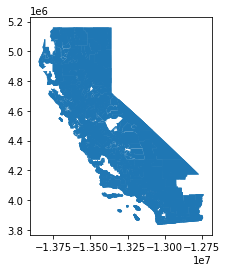

In [16]:
CA.plot()

In [17]:
CA_hs=CA[CA.level=='3']

In [18]:
CA_hs.shape

(1037, 14)

<AxesSubplot:>

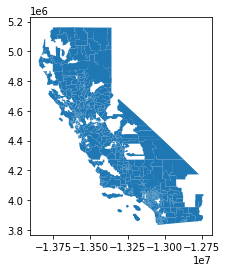

In [19]:
CA_hs.plot()

In [20]:
CA_schools=CA_hs.merge(schools_data,left_on='ncessch', right_on='NCESSCH')

In [21]:
CA_schools.head()

,SrcName,ncessch,schnam,leaid,gslo,gshi,defacto,stAbbrev,openEnroll,Shape_Leng,...,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,geometry_y
0,Vasquez High,060000103278,Vasquez High,0600001,09,12,0,CA,0,133901.224937,...,1,348,"Los Angeles-Long Beach, CA",N,N,0625,06036,06021,2019-2020,POINT (-118.21610 34.49360)
1,None,060000908779,Cuyama Valley High,0600009,09,12,1,CA,0,376387.196533,...,1,N,N,N,N,0624,06035,06019,2019-2020,POINT (-119.67470 34.94380)
2,None,060001109065,Herlong High,0600011,09,12,1,CA,0,209495.629862,...,2,N,N,N,N,0601,06001,06001,2019-2020,POINT (-120.14420 40.13910)
3,Rocklin High,060001302405,Rocklin High,0600013,09,12,0,CA,0,30541.411329,...,1,472,"Sacramento-Roseville, CA",N,N,0604,06006,06001,2019-2020,POINT (-121.25110 38.81430)
4,Whitney High,060001311010,Whitney High,0600013,09,12,0,CA,0,56098.318059,...,1,472,"Sacramento-Roseville, CA",N,N,0604,06006,06001,2019-2020,POINT (-121.28940 38.83640)


In [22]:
CA_schools.head()

,SrcName,ncessch,schnam,leaid,gslo,gshi,defacto,stAbbrev,openEnroll,Shape_Leng,...,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,geometry_y
0,Vasquez High,060000103278,Vasquez High,0600001,09,12,0,CA,0,133901.224937,...,1,348,"Los Angeles-Long Beach, CA",N,N,0625,06036,06021,2019-2020,POINT (-118.21610 34.49360)
1,None,060000908779,Cuyama Valley High,0600009,09,12,1,CA,0,376387.196533,...,1,N,N,N,N,0624,06035,06019,2019-2020,POINT (-119.67470 34.94380)
2,None,060001109065,Herlong High,0600011,09,12,1,CA,0,209495.629862,...,2,N,N,N,N,0601,06001,06001,2019-2020,POINT (-120.14420 40.13910)
3,Rocklin High,060001302405,Rocklin High,0600013,09,12,0,CA,0,30541.411329,...,1,472,"Sacramento-Roseville, CA",N,N,0604,06006,06001,2019-2020,POINT (-121.25110 38.81430)
4,Whitney High,060001311010,Whitney High,0600013,09,12,0,CA,0,56098.318059,...,1,472,"Sacramento-Roseville, CA",N,N,0604,06006,06001,2019-2020,POINT (-121.28940 38.83640)


In [23]:
type(CA_schools)

pandas.core.frame.DataFrame

In [24]:
CA_dataframe=geopandas.GeoDataFrame(CA_schools, geometry = "geometry_y")

In [25]:
type(CA_schools)

pandas.core.frame.DataFrame

<AxesSubplot:>

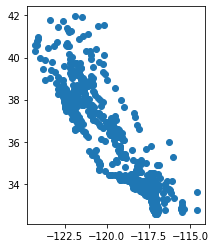

In [26]:
CA_dataframe.plot()

In [27]:
CA_schools.loc[:,"NMCNTY"]

0        Los Angeles County
1      Santa Barbara County
2             Lassen County
3             Placer County
4             Placer County
               ...         
928           Fresno County
929        Riverside County
930        Riverside County
931         Tuolumne County
932         Tuolumne County
Name: NMCNTY, Length: 933, dtype: object

In [28]:
CA_schools.loc[:,"NMCNTY"]

0        Los Angeles County
1      Santa Barbara County
2             Lassen County
3             Placer County
4             Placer County
               ...         
928           Fresno County
929        Riverside County
930        Riverside County
931         Tuolumne County
932         Tuolumne County
Name: NMCNTY, Length: 933, dtype: object

In [29]:
CA_schools.loc[:,"CNTY"]

0      06037
1      06083
2      06035
3      06061
4      06061
       ...  
928    06019
929    06065
930    06065
931    06109
932    06109
Name: CNTY, Length: 933, dtype: object

In [30]:
CA_schools.loc[CA_schools['CNTY'] == 929]

,SrcName,ncessch,schnam,leaid,gslo,gshi,defacto,stAbbrev,openEnroll,Shape_Leng,...,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,geometry_y


In [31]:
CA_schools[['CNTY']]

,CNTY
0,06037
1,06083
2,06035
3,06061
4,06061
...,...
928,06019
929,06065
930,06065
931,06109


In [32]:
rivcoschools = CA_schools[CA_schools.CNTY == '06065']
CA_schools.head()

,SrcName,ncessch,schnam,leaid,gslo,gshi,defacto,stAbbrev,openEnroll,Shape_Leng,...,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,geometry_y
0,Vasquez High,060000103278,Vasquez High,0600001,09,12,0,CA,0,133901.224937,...,1,348,"Los Angeles-Long Beach, CA",N,N,0625,06036,06021,2019-2020,POINT (-118.21610 34.49360)
1,None,060000908779,Cuyama Valley High,0600009,09,12,1,CA,0,376387.196533,...,1,N,N,N,N,0624,06035,06019,2019-2020,POINT (-119.67470 34.94380)
2,None,060001109065,Herlong High,0600011,09,12,1,CA,0,209495.629862,...,2,N,N,N,N,0601,06001,06001,2019-2020,POINT (-120.14420 40.13910)
3,Rocklin High,060001302405,Rocklin High,0600013,09,12,0,CA,0,30541.411329,...,1,472,"Sacramento-Roseville, CA",N,N,0604,06006,06001,2019-2020,POINT (-121.25110 38.81430)
4,Whitney High,060001311010,Whitney High,0600013,09,12,0,CA,0,56098.318059,...,1,472,"Sacramento-Roseville, CA",N,N,0604,06006,06001,2019-2020,POINT (-121.28940 38.83640)


In [33]:
sdschools = CA_schools[CA_schools.CNTY == '06073']

In [34]:
sdschools.head()

,SrcName,ncessch,schnam,leaid,gslo,gshi,defacto,stAbbrev,openEnroll,Shape_Leng,...,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,geometry_y
38,None,060004205341,Warner Junior/Senior High,0600042,07,12,1,CA,0,249481.979211,...,1,N,N,N,N,0650,06071,06038,2019-2020,POINT (-116.64311 33.27433)
61,None,060006908607,Valley Center High,0600069,09,12,0,CA,0,200628.920436,...,1,N,N,N,N,0650,06075,06038,2019-2020,POINT (-117.02460 33.27970)
145,None,060570000518,Borrego Springs High,0605700,09,12,1,CA,0,187164.887171,...,1,N,N,N,N,0650,06071,06038,2019-2020,POINT (-116.38280 33.26500)
168,Carlsbad HS,060750000709,Carlsbad High,0607500,09,12,0,CA,0,52514.184328,...,1,N,N,N,N,0649,06076,06036,2019-2020,POINT (-117.32930 33.16370)
169,Sage HS,060750013058,Sage Creek High,0607500,09,12,0,CA,0,52514.184328,...,1,N,N,N,N,0649,06076,06036,2019-2020,POINT (-117.28477 33.15848)


In [35]:
ocschools = CA_schools[CA_schools.CNTY == '06059']

In [36]:
ocschools.head()

,SrcName,ncessch,schnam,leaid,gslo,gshi,defacto,stAbbrev,openEnroll,Shape_Leng,...,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,geometry_y
99,Anaheim High,060263000169,Anaheim High,0602630,09,12,0,CA,0,22766.893402,...,1,348,"Los Angeles-Long Beach, CA",N,N,0646,06069,06029,2019-2020,POINT (-117.92420 33.83370)
100,Cypress High,060263000172,Cypress High,0602630,09,12,0,CA,0,20510.276195,...,1,348,"Los Angeles-Long Beach, CA",N,N,0647,06065,06029,2019-2020,POINT (-118.02920 33.82020)
101,Katella High,060263000176,Katella High,0602630,09,12,0,CA,0,23965.773536,...,1,348,"Los Angeles-Long Beach, CA",N,N,0646,06069,06034,2019-2020,POINT (-117.88550 33.82400)
102,Kennedy High,060263000177,John F. Kennedy High,0602630,09,12,0,CA,0,17198.602153,...,1,348,"Los Angeles-Long Beach, CA",N,N,0638,06065,06029,2019-2020,POINT (-118.03770 33.84100)
103,Loara High,060263000180,Loara High,0602630,09,12,0,CA,0,22420.975852,...,1,348,"Los Angeles-Long Beach, CA",N,N,0646,06065,06029,2019-2020,POINT (-117.94380 33.81170)


In [37]:
sbschools = CA_schools[CA_schools.CNTY == '06071']

In [38]:
sbschools.head()

,SrcName,ncessch,schnam,leaid,gslo,gshi,defacto,stAbbrev,openEnroll,Shape_Leng,...,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,geometry_y
5,Sultana High,060001405093,Sultana High,0600014,09,12,0,CA,0,89979.972891,...,1,348,"Los Angeles-Long Beach, CA",N,N,0608,06033,06021,2019-2020,POINT (-117.28670 34.41040)
6,Hesperia High,060001409072,Hesperia High,0600014,09,12,0,CA,0,44514.216379,...,1,348,"Los Angeles-Long Beach, CA",N,N,0608,06033,06021,2019-2020,POINT (-117.34770 34.43010)
7,Oak Hills High,060001412417,Oak Hills High,0600014,09,12,0,CA,0,46504.030397,...,1,348,"Los Angeles-Long Beach, CA",N,N,0608,06033,06021,2019-2020,POINT (-117.38410 34.38900)
8,None,060001510305,Lucerne Valley High,0600015,09,12,1,CA,0,260124.495313,...,1,348,"Los Angeles-Long Beach, CA",N,N,0608,06033,06016,2019-2020,POINT (-116.93920 34.45720)
9,Upland HS,060001609086,Upland High,0600016,09,12,0,CA,0,51710.014112,...,1,348,"Los Angeles-Long Beach, CA",N,N,0631,06041,06025,2019-2020,POINT (-117.65810 34.10450)


In [40]:
sbschools = geopandas.GeoDataFrame(sbschools, geometry = "geometry_y")

In [41]:
type(sbschools)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

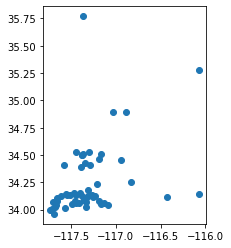

In [42]:
sbschools.plot()

In [43]:
ocschools = geopandas.GeoDataFrame(sbschools, geometry = "geometry_y")

<AxesSubplot:>

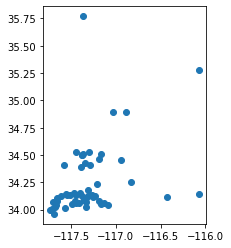

In [44]:
ocschools.plot()

In [45]:
sdschools = geopandas.GeoDataFrame(sbschools, geometry = "geometry_y")

<AxesSubplot:>

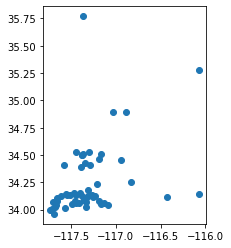

In [46]:
sdschools.plot()

In [47]:
rivcoschools = geopandas.GeoDataFrame(sbschools, geometry = "geometry_y")

<AxesSubplot:>

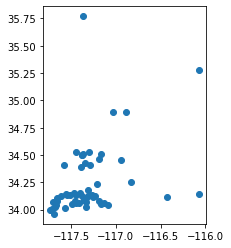

In [48]:
rivcoschools.plot()

In [49]:
counties = pandas.concat([sdschools, rivcoschools, sbschools, ocschools], axis = 1) 

In [50]:
type(counties)

geopandas.geodataframe.GeoDataFrame

In [51]:
counties.shape

(54, 160)

In [52]:
counties = geopandas.GeoDataFrame(counties, geometry = "geometry_y")

ValueError: 'data' should be a 1-dimensional array of geometry objects.